# Churn Prediction

The dataset is the details of the customers who left or not in a company.

The aim is to predict whether a customer will leave or not a company.

### Data Cleaning and Processing

In [2122]:
import numpy as np
import pandas as pd

In [2123]:
df = pd.read_csv('ChurnModelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2125]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) 

In [2126]:
df1 = pd.get_dummies(data=df, columns=['Geography', 'Gender'])

In [2127]:
X = df1.drop('Exited', axis=1)
y_label = df1['Exited']
y = y_label.values

### Feature Scaling

In [2128]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_scale = minmax_scaler.fit_transform(X)

### Splitting Dataset into Train, Validation and Test sets

In [2129]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

### Building and Configuration an ANN model 

In [2130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(26, input_shape=(13,), activation='relu'),
    Dense(13, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the model on the train set

In [2131]:
training_history = model.fit(X_train, y_train, epochs=100, batch_size=28, validation_data=(X_val, y_val))

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.7923 - val_loss: 0.4858 - val_accuracy: 0.7793
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7984 - val_loss: 0.4675 - val_accuracy: 0.7940
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8051 - val_loss: 0.4476 - val_accuracy: 0.8020
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8116 - val_loss: 0.4328 - val_accuracy: 0.8167
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8136 - val_loss: 0.4230 - val_accuracy: 0.8193
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8216 - val_loss: 0.4095 - val_accuracy: 0.8213
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8269 - val_loss: 0.4049 - val_accuracy: 0.8247

Epoch 58/100
250/250 [==============================] - 0s 985us/step - loss: 0.3319 - accuracy: 0.8603 - val_loss: 0.3558 - val_accuracy: 0.8540
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8630 - val_loss: 0.3626 - val_accuracy: 0.8487
Epoch 60/100
250/250 [==============================] - 0s 985us/step - loss: 0.3317 - accuracy: 0.8631 - val_loss: 0.3528 - val_accuracy: 0.8560
Epoch 61/100
250/250 [==============================] - 0s 997us/step - loss: 0.3300 - accuracy: 0.8640 - val_loss: 0.3521 - val_accuracy: 0.8580
Epoch 62/100
250/250 [==============================] - 0s 989us/step - loss: 0.3287 - accuracy: 0.8641 - val_loss: 0.3605 - val_accuracy: 0.8527
Epoch 63/100
250/250 [==============================] - 0s 991us/step - loss: 0.3301 - accuracy: 0.8611 - val_loss: 0.3550 - val_accuracy: 0.8567
Epoch 64/100
250/250 [==============================] - 0s 989us/step - loss: 0.3291 - accuracy: 0.8643 - val_loss: 0.3565 - v

### Evaluating the model on the test set

In [2132]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 694us/step - loss: 0.3385 - accuracy: 0.8600


[0.3385211229324341, 0.8600000143051147]

### Predicting the labels on the test set and rounding predictions up to 0 or 1 (not exited or exited)

In [2133]:
yhat = model.predict(X_test)

yhat[:10]

array([[0.15021282],
       [0.01390487],
       [0.17222786],
       [0.25309503],
       [0.7663888 ],
       [0.12387848],
       [0.00726038],
       [0.10908166],
       [0.04376996],
       [0.03316301]], dtype=float32)

In [2134]:
ypred = []
for element in yhat:
    if(element > 0.5):
        ypred.append(1)
    else:
        ypred.append(0)
        

ypred[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [2135]:
y_test[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

### Accuracy Score and Classification Report

In [2136]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))

0.86
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1222
           1       0.64      0.56      0.60       278

    accuracy                           0.86      1500
   macro avg       0.77      0.74      0.76      1500
weighted avg       0.85      0.86      0.86      1500



### Confussion Matrix

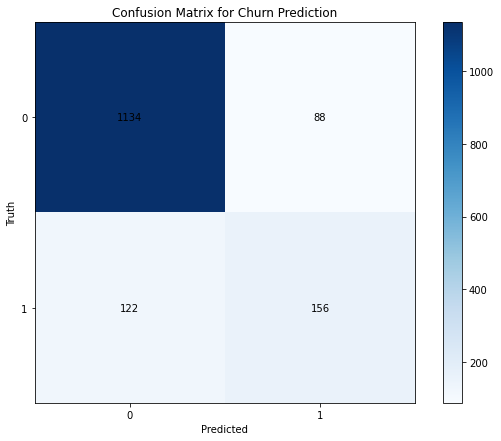

In [2137]:
from matplotlib import pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(10,7))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix for Churn Prediction')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')

### Visualizing Loss and Accuracy

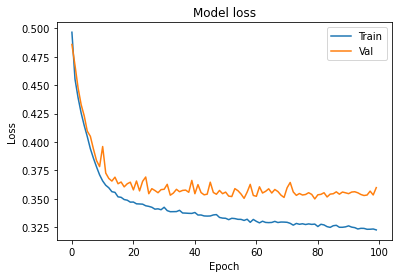

In [2138]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

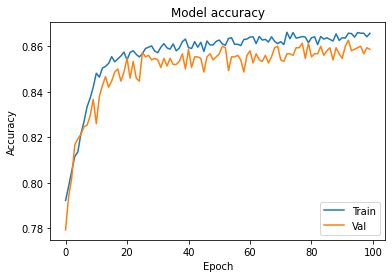

In [2139]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()